In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [33]:
dataset = pd.read_csv('mTOR_descriptors.csv', lineterminator='\n')

/tmp/ipykernel_37381/1498784649.py:1: DtypeWarning: Columns (142,151,160,169,178,187,196,205,214,223,232,349,358,367,376,385,394,403,412,421,430,439,448,456,464,472,480,488,496,504,512,520,528,536,544,552,560,568,576,584,592,600,608,616,624,632,640,1055,1057,1060,1065,1077,1078,1084,1134,1136,1139,1144,1156,1157,1163,1360,1361,1363,1375,1376,1582) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('mTOR_descriptors.csv', lineterminator='\n')


In [34]:
# Split data betwen metadata and features
non_numeric_metadata_columns = ["molecule_chembl_id", "class", "canonical_smiles"]

features = dataset.drop(non_numeric_metadata_columns, axis=1)
non_numerica_metadata = dataset[non_numeric_metadata_columns]

In [35]:
####################
# Cleaning Dataset #
####################

# Remove Columns with only String Values

features = features.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

# Imputing Missing Values - change to regression imputing (more accurate)
# # fit regression model using Bayesian Ridge
# imputer = IterativeImputer(estimator=BayesianRidge())

# # impute missing values
# imputed_data = imputer.fit_transform(features)

features = features.fillna(features.mean())

In [36]:
means = pd.DataFrame(features.mean(axis=0))
means = means.T
means.to_csv('mean_columns.csv', index=False)

In [37]:
means

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,MW.1,LogP,NumHDonors,NumHAcceptors,pIC50
0,0.01352,0.303316,44.389752,2.49087,4.942492,44.389752,1.309804,4.447335,4.687773,0.14193,...,56.744898,183.165816,218.094643,10.140829,7.378208,467.274863,3.225547,1.616837,7.573469,7.267988


In [41]:
# Remove Features with Low Variance

from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=(.8 * (1 - .8))):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

features = variance_threshold_selector(features)

In [42]:
dataset = pd.concat([features, non_numerica_metadata], axis=1)

<Axes: xlabel='class'>

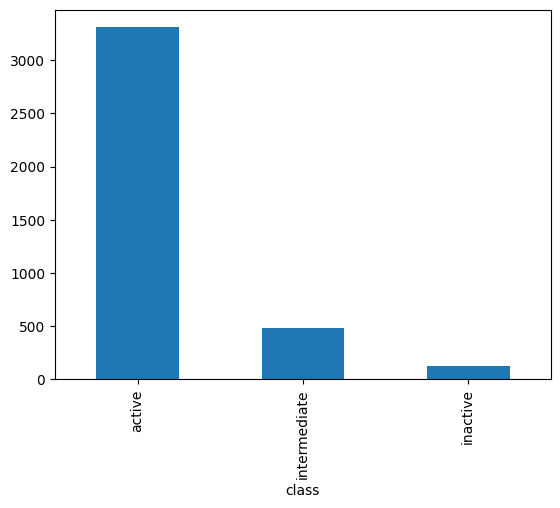

In [48]:
dataset['class'].value_counts().plot(kind='bar')

In [50]:
# Class Numbers
print(dataset['class'].value_counts())

class
active          3310
intermediate     486
inactive         124
Name: count, dtype: int64


In [51]:
# We want to have equal number of classes for a balanced dataset

active = dataset[dataset["class"] == "active"]
intermediate = dataset[dataset["class"] == "intermediate"]
inactive = dataset[dataset["class"] == "inactive"]

dataset = pd.concat([active[0:124], intermediate[0:124], inactive[0:124]], axis=0).reset_index(drop=True)

In [52]:
print(dataset['class'].value_counts())

class
active          124
intermediate    124
inactive        124
Name: count, dtype: int64


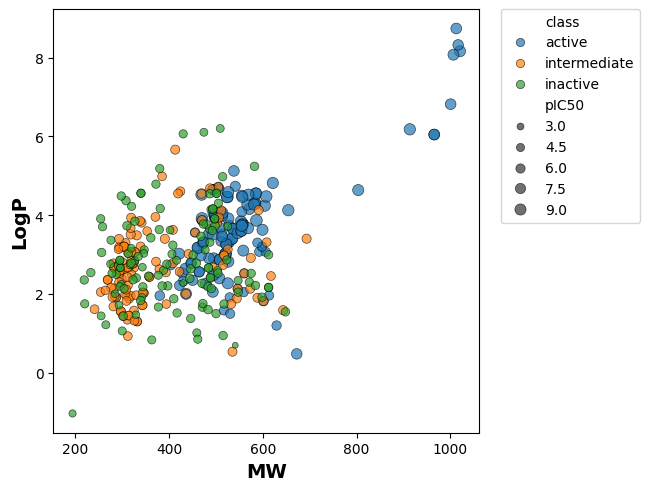

In [54]:
####################
# Data Exploration #
####################

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=dataset, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Text(0, 0.5, 'pIC50 value')

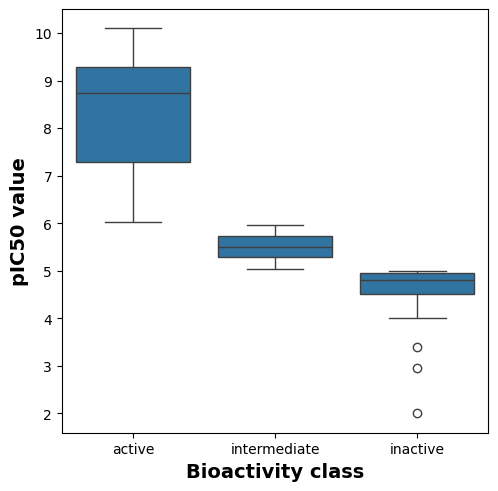

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = dataset)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

In [56]:
dataset.to_csv('mTOR_dataset.csv', index=False)